In [7]:
# Importar las bibliotecas necesarias

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [8]:
# Cargar el dataset
fichero_DemandaDiaria = "/Users/administrador/Desktop/Ingenieria Informatica UPSA/Curso 3/Prediccion Demanda Electrica/Datos/DemandaDiaria_KWh_2015-2021.csv"
data = pd.read_csv(fichero_DemandaDiaria, sep=";")
data['Date'] = pd.to_datetime(data['Date'])  # Convertir la columna de fecha a tipo datetime
data = data.set_index('Date')  # Establecer la columna de fecha como índice

# Preprocesamiento de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Load'].values.reshape(-1, 1))

# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# Crear secuencias de entrenamiento
def create_sequences(dataset, sequence_length):
    X, y = [], []
    for i in range(len(dataset) - sequence_length):
        X.append(dataset[i:i + sequence_length, 0])
        y.append(dataset[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 10  # Longitud de la secuencia de entrada
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
print( X_train )

[[0.257157   0.54445583 0.50502522 ... 0.84000149 0.81225939 0.59027355]
 [0.54445583 0.50502522 0.41530051 ... 0.81225939 0.59027355 0.45577104]
 [0.50502522 0.41530051 0.54681913 ... 0.59027355 0.45577104 0.76987546]
 ...
 [0.5137549  0.41194471 0.7487154  ... 0.59702571 0.43089742 0.62173645]
 [0.41194471 0.7487154  0.7997442  ... 0.43089742 0.62173645 0.63427468]
 [0.7487154  0.7997442  0.80751022 ... 0.62173645 0.63427468 0.66963289]]


In [9]:
# Definir los hiperparámetros a probar para cada kernel - linear
parameters = {'kernel': ['linear'], 'C': [0.1, 1, 10]}
modelo_lineal = SVR()
grid_search_lineal = GridSearchCV(modelo_lineal, parameters)
grid_search_lineal.fit(X_train, y_train)
best_model_lineal = grid_search_lineal.best_estimator_

In [10]:
# Realizar predicciones con los mejores modelos
y_pred_lineal = best_model_lineal.predict(X_test)

In [11]:
# Reescalar las predicciones a los valores originales
y_pred_lineal_orig = scaler.inverse_transform(y_pred_lineal.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [12]:
# Calcular los errores
mae_lineal = mean_absolute_error(y_test_orig, y_pred_lineal_orig)
rmse_lineal = np.sqrt(mean_squared_error(y_test_orig, y_pred_lineal_orig))
mrae_lineal = mae_lineal / np.mean(y_test_orig)

print("Resultados con kernel lineal:")
print("MAE:", mae_lineal)
print("RMSE:", rmse_lineal)
print("MRAE:", mrae_lineal)

Resultados con kernel lineal:
MAE: 195333518.56162122
RMSE: 276235810.3889481
MRAE: 0.02949617883348797


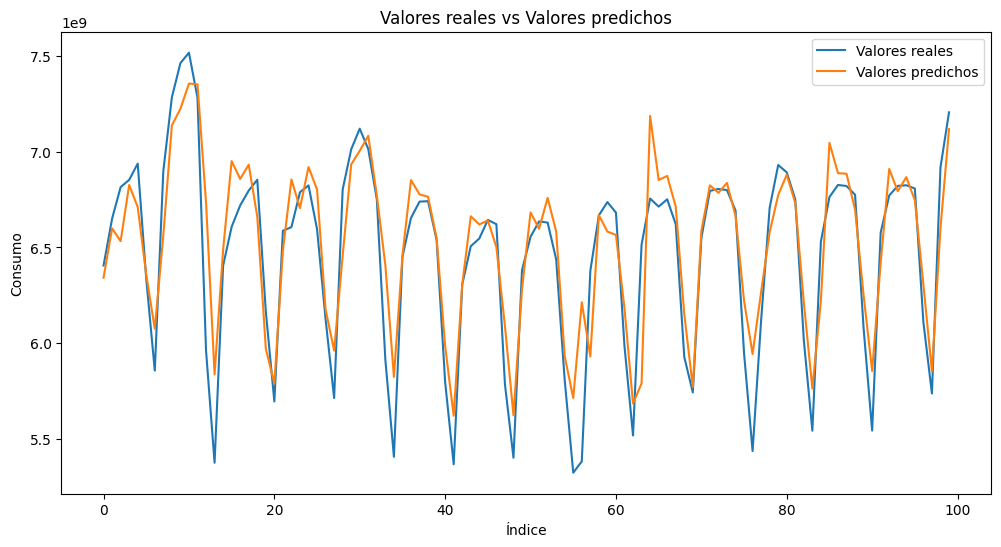

In [14]:
# Establecer el rango de índices para visualizar
start_index = 0
end_index = 100

# Representar los valores reales y predichos dentro del rango especificado
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig[start_index:end_index], label='Valores reales')
plt.plot(y_pred_lineal_orig[start_index:end_index], label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('Consumo')
plt.title('Valores reales vs Valores predichos')
plt.legend()
plt.show()